# Lecture 5: Time Series and Longitudinal Data (Expanded)

### Objectives
- Visualize trends over time with `datetime` x-axes
- Use line plots and faceting to show repeated measures by group
- Highlight events like holidays or interventions
- Work with realistic simulated datasets

## Part 1: Preschool Height Tracking (Monthly over 12 Months)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

sns.set(style="whitegrid")
np.random.seed(42)

In [74]:
# Simulate data
n_kids = 20
n_months = 12
start_date = pd.to_datetime("2022-01-01")
dates = pd.date_range(start=start_date, periods=n_months, freq='MS')

records = []
for kid_id in range(n_kids):
    age_at_baseline = np.random.choice([3,4],size=1)[0]
    height = np.random.normal(90, 5) + (age_at_baseline-3)*5
    growth_rate = np.max([1,np.random.normal(1.005, 0.004)])
    for month, d in enumerate(dates):
        noise = np.max([0,np.random.normal(0,.1)])
        height = height*growth_rate + noise
        records.append({"kid": f"Kid {kid_id+1}", "age at baseline":age_at_baseline, "date": d, "height": height})

height_df = pd.DataFrame(records)
height_df['age at baseline'] = pd.Categorical(height_df['age at baseline'])

In [75]:
height_df.head()

,kid,age at baseline,date,height
0,Kid 1,4,2022-01-01,89.789778
1,Kid 1,4,2022-02-01,89.874885
2,Kid 1,4,2022-03-01,90.024942
3,Kid 1,4,2022-04-01,90.024942
4,Kid 1,4,2022-05-01,90.024942


### Plot: Height over Time for All Children

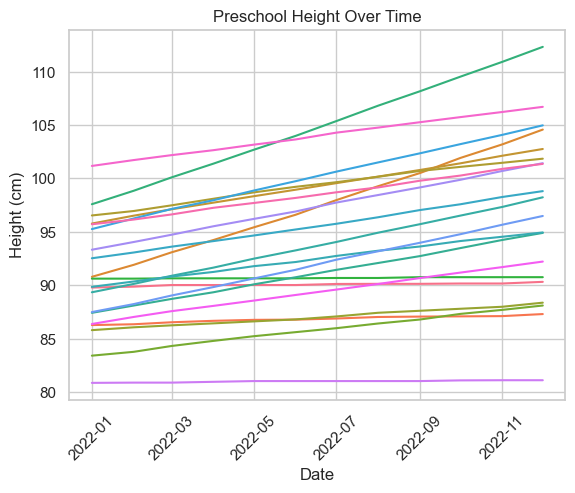

In [76]:
sns.lineplot(data=height_df, x="date", y="height", hue="kid", legend=False)
plt.title("Preschool Height Over Time")
plt.xlabel("Date")
plt.ylabel("Height (cm)")
plt.xticks(rotation=45)
plt.show()

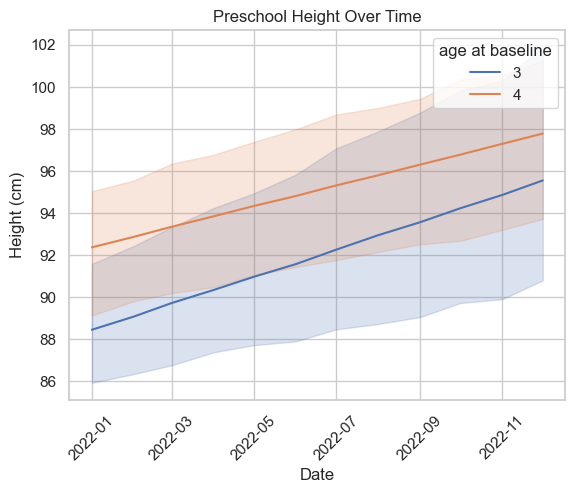

In [77]:
sns.lineplot(data=height_df, x="date", y="height", hue="age at baseline")
plt.title("Preschool Height Over Time")
plt.xlabel("Date")
plt.ylabel("Height (cm)")
plt.xticks(rotation=45)
plt.show()

### Facet by Child

In [78]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

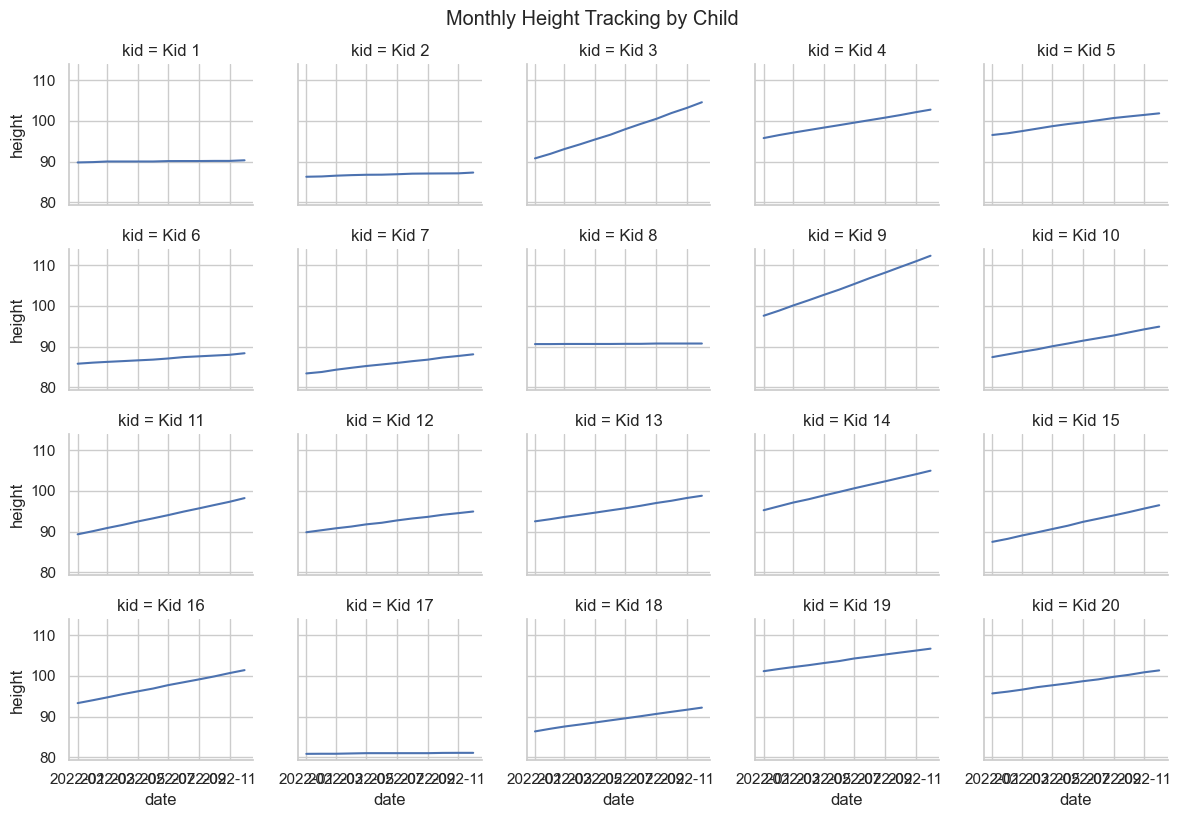

In [79]:
sns.relplot(data=height_df, x="date", y="height", kind="line", col="kid", col_wrap=5,
             height=2, aspect=1.2)
plt.suptitle("Monthly Height Tracking by Child", y = 1.02)
plt.show()

### Highlight period (e.g., summer break)

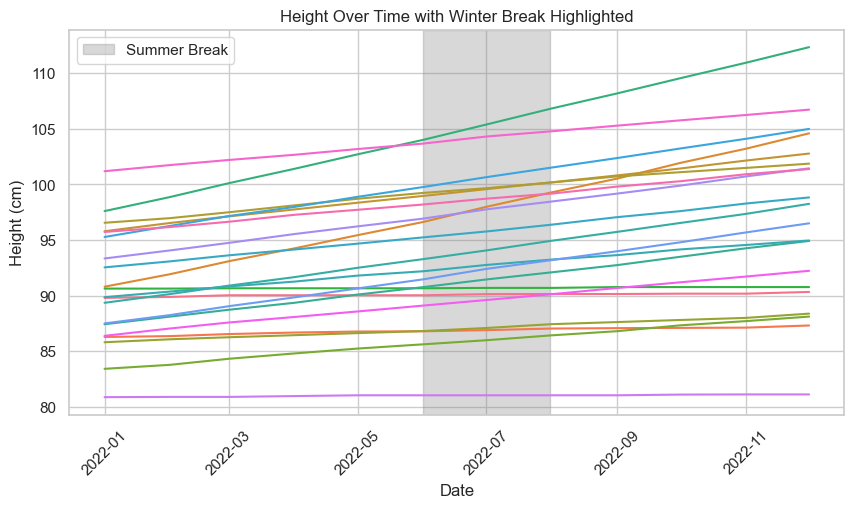

In [81]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=height_df, x="date", y="height", hue="kid", legend=False)
plt.axvspan(pd.to_datetime("2022-06-01"), pd.to_datetime("2022-07-31"), color='gray', alpha=0.3, label='Summer Break')
plt.title("Height Over Time with Winter Break Highlighted")
plt.xlabel("Date")
plt.ylabel("Height (cm)")
plt.legend()
plt.xticks(rotation=45)
plt.show()